In [18]:
from P3_helpers import * 
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
df_ref = get_dataframe()
df_ref

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1.0,2003.0,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1.0,2003.0,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1.0,2003.0,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1.0,2003.0,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


In [3]:
def load_com_csv(file_path):
    #load the file
    df_com = pd.read_csv(file_path)
    #remove the -source in each source name
    df_com['Source'] = df_com['Source'].str.replace('-source', '')
    
    return df_com

In [4]:
years = df_ref['Year'].unique()
df_com = pd.DataFrame(columns = ['Year', 'Community_df'])
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    df_com.loc[len(df_com)] = [year, df_]
df_com


,Year,Community_df
0,2013.0,Source Community 0 Steel1943...
1,2012.0,Source Community 0 ...
2,2011.0,Source Community 0 ...
3,2010.0,Source Community 0 ...
4,2009.0,Source Community 0 ...
5,2008.0,Source Community 0 Acalamari ...
6,2007.0,Source Community 0 ...
7,2006.0,Source Community 0 ...
8,2004.0,Source Community 0 ...
9,2005.0,Source Community 0 ...


In [5]:
df_com_stat = pd.DataFrame(columns = ['Year'])
df_com_stat['Year'] = years

list_nbr_com = df_com['Community_df'].apply(lambda x: x['Community'].max()+1)
df_com_stat['Nbr_of_com'] = list_nbr_com

list_nbr_in_com_ = df_com['Community_df'].apply(lambda x: x.groupby('Community').size())
df_com_stat['Com_size'] = list(list_nbr_in_com_.values)
#remove nan values when the number of community is lower
list_nbr_in_com_filtered = df_com_stat['Com_size'].apply(lambda x: x[~np.isnan(x)])
df_com_stat['Com_size'] = list_nbr_in_com_filtered
df_com_stat

,Year,Nbr_of_com,Com_size
0,2013.0,6,"[54.0, 244.0, 111.0, 79.0, 155.0, 152.0]"
1,2012.0,3,"[301.0, 355.0, 415.0]"
2,2011.0,5,"[409.0, 77.0, 391.0, 329.0, 58.0]"
3,2010.0,4,"[255.0, 595.0, 296.0, 447.0]"
4,2009.0,5,"[17.0, 515.0, 736.0, 434.0, 372.0]"
5,2008.0,4,"[960.0, 427.0, 950.0, 365.0]"
6,2007.0,4,"[1255.0, 730.0, 1147.0, 184.0]"
7,2006.0,3,"[1229.0, 1230.0, 789.0]"
8,2004.0,5,"[188.0, 127.0, 22.0, 278.0, 25.0]"
9,2005.0,6,"[685.0, 355.0, 576.0, 15.0, 57.0, 48.0]"


Type of vote

In [6]:
years = df_ref['Year'].unique()
dict_com = {}
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    dict_com[str(int(year))]=df_



In [15]:
def com_vote(df_ref, df_com_year_, year):
    #filter the ref df
    df_ref_year = df_ref[df_ref['Year']==int(year)]
    #extract the source for the community df for 1 year
    source_per_com = df_com_year_.groupby('Community').apply(lambda x : x['Source'])
    pos_vote_prop = []
    neg_vote_prop = []
    neu_vote_prop = []
    #loop over all communities of this year
    for n in range (df_com_year_['Community'].max()+1):
        com = list(source_per_com[n].values)
        #extract rows of the ref df based on the source which are in the community n
        df_com = df_ref_year[df_ref_year['Source'].isin(com)].reset_index(drop=True)
        #extract proportion for theses sources
        prop_vote_pos_com = np.sum(df_com['Vote']==1)/len(df_com['Vote'])
        prop_vote_neg_com = np.sum(df_com['Vote']==-1)/len(df_com['Vote'])
        prop_vote_neu_com = np.sum(df_com['Vote']==0)/len(df_com['Vote'])
        pos_vote_prop.append(prop_vote_pos_com)
        neg_vote_prop.append(prop_vote_neg_com)
        neu_vote_prop.append(prop_vote_neu_com)
    #create the df
    years_ = [int(year)]*(df_com_year_['Community'].max()+1)
    com = list(range(df_com_year_['Community'].max()+1))
    df_stat_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
    df_stat_com['Year'] = years_
    df_stat_com['Com_nbr'] = com
    df_stat_com['Pos_vote_prop'] = pos_vote_prop
    df_stat_com['Neg_vote_prop'] = neg_vote_prop
    df_stat_com['Neu_vote_prop'] = neu_vote_prop
    
    return df_stat_com

In [16]:
df_stat_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
for year in dict_com.keys():
    df_com_year = dict_com[str(year)]
    stat_com = com_vote(df_ref, df_com_year, year)
    df_stat_com = pd.concat([df_stat_com, stat_com], ignore_index=True)
df_stat_com

,Year,Com_nbr,Pos_vote_prop,Neg_vote_prop,Neu_vote_prop
0,2013,0,0.451220,0.463415,0.085366
1,2013,1,0.802198,0.133929,0.063874
2,2013,2,0.706037,0.233596,0.060367
3,2013,3,0.728448,0.211207,0.060345
4,2013,4,0.718789,0.225725,0.055485
5,2013,5,0.791191,0.153344,0.055465
6,2012,0,0.664959,0.272029,0.063012
7,2012,1,0.753418,0.192834,0.053748
8,2012,2,0.613569,0.315634,0.070796
9,2011,0,0.755687,0.185341,0.058972


In [44]:
def plot_dist_vote_per_com(df, years):
    # Melt the DataFrame to make it suitable for Seaborn
    df_melt = pd.melt(df[df_stat_com['Year'].isin(years)], id_vars=['Com_nbr', 'Year'], value_vars=['Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'],
                        var_name='Type de Vote', value_name='Pourcentage')

    # Create a facet grid with a separate plot for each year
    g = sns.catplot(x='Com_nbr', y='Pourcentage', hue='Type de Vote', col='Year', data=df_melt, kind='bar', palette='colorblind')

    # Add labels and title
    g.set_axis_labels('Community', 'Vote percentage')
    g.fig.suptitle('Vote percentage per community and per year', y=1.02)

    # Move legend to below the graph
    g.fig.subplots_adjust(bottom=0.2)
    sns.move_legend(g, "upper center", bbox_to_anchor=(.5, 0.1), ncol=3, title=None, frameon=False)

    # Show the plot
    plt.show()

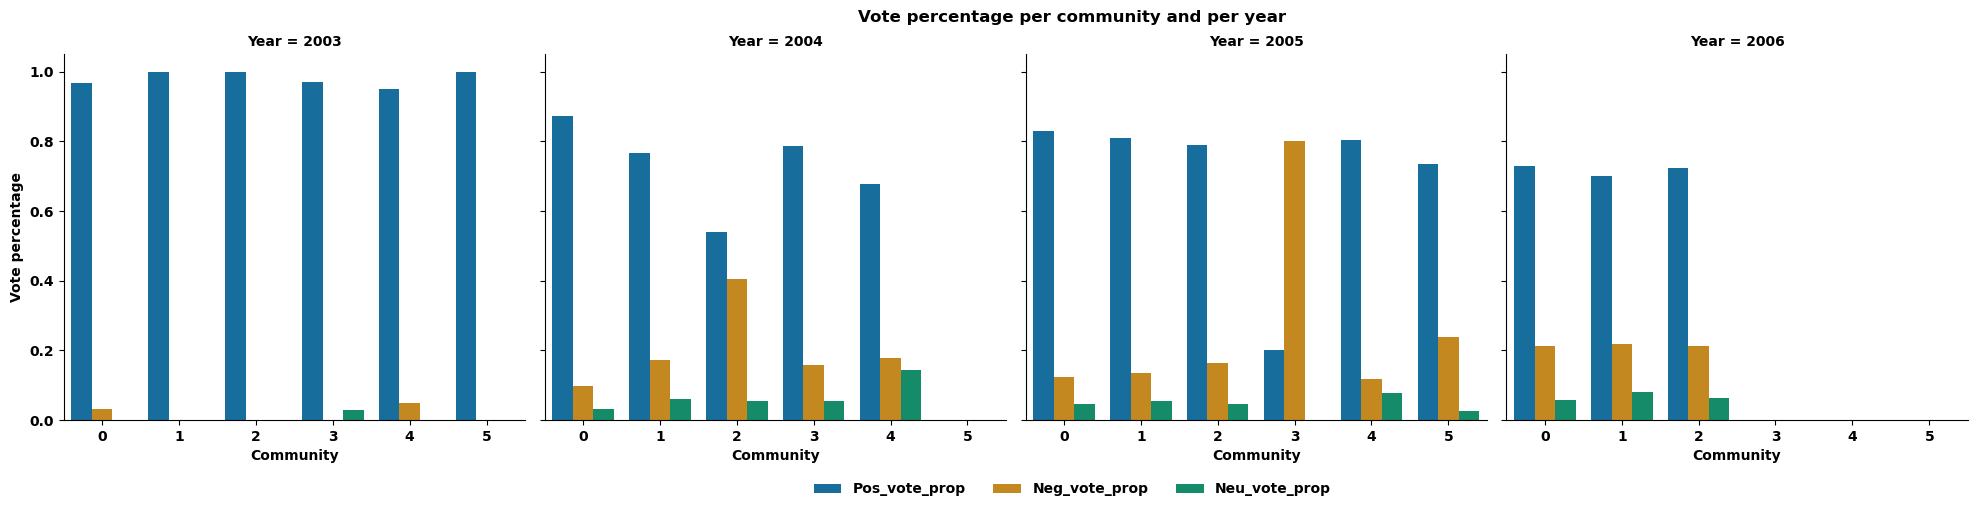

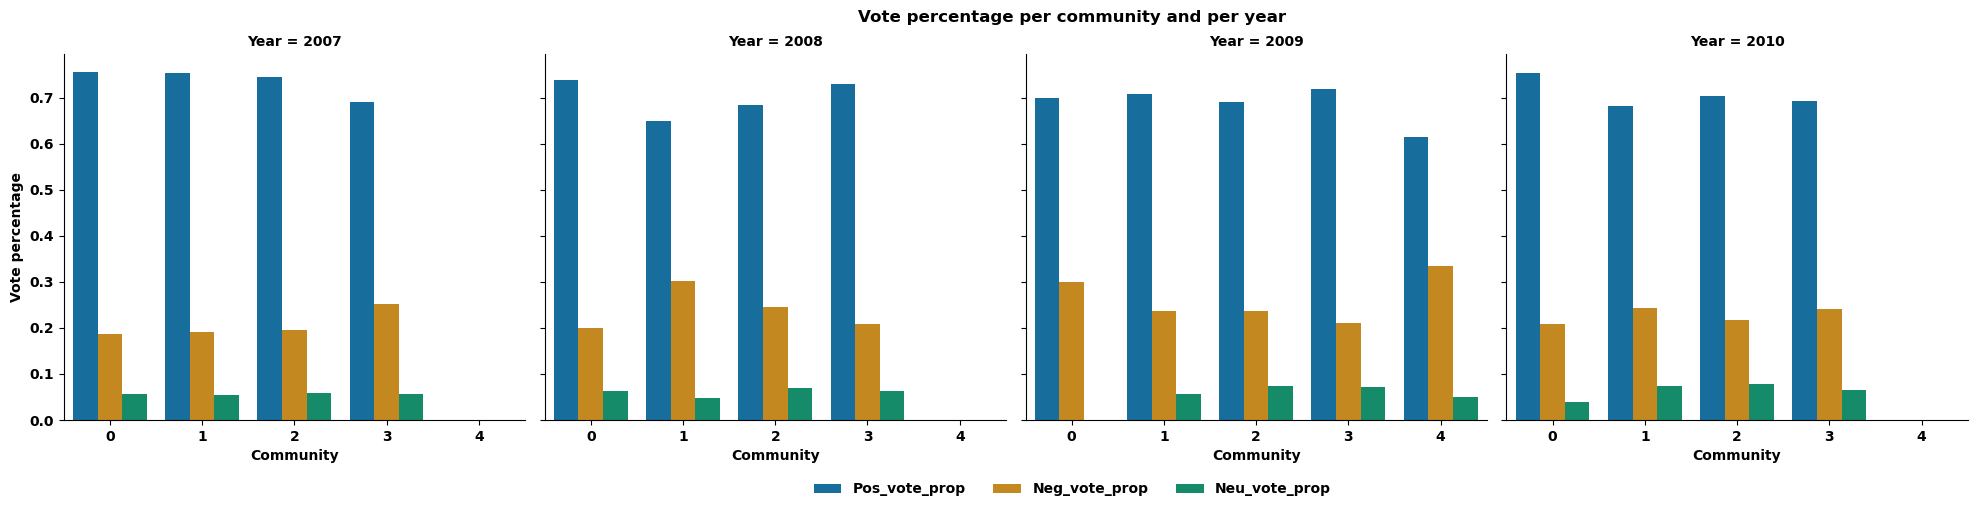

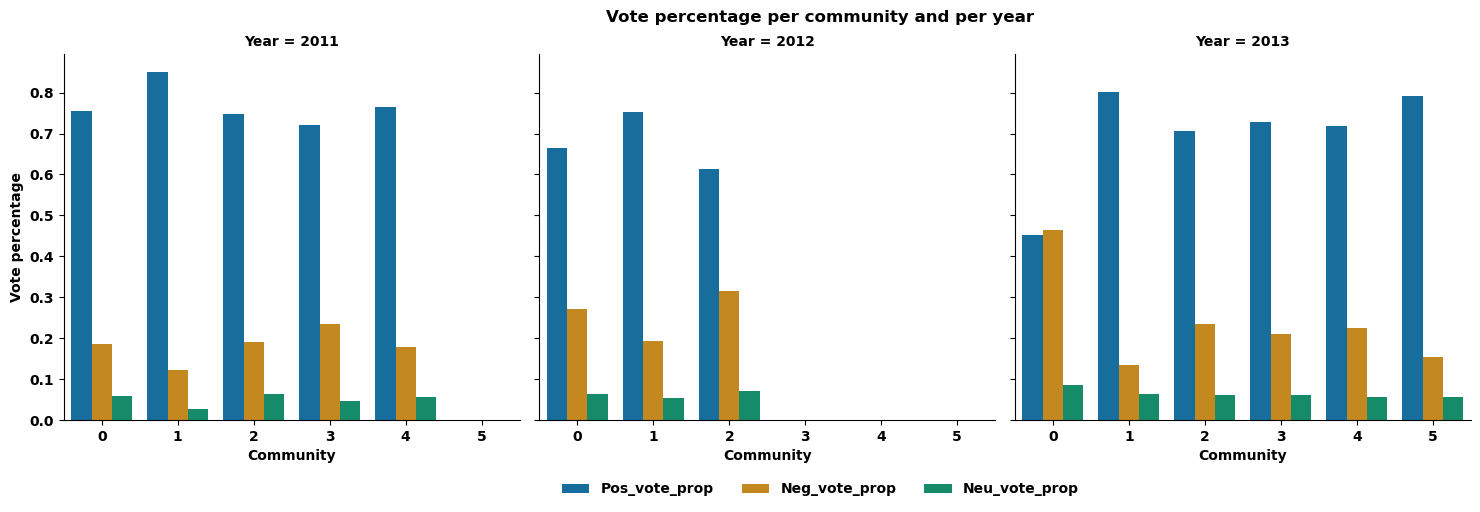

In [46]:
plot_dist_vote_per_com(df_stat_com, [2003,2004,2005,2006])
plot_dist_vote_per_com(df_stat_com, [2007,2008,2009,2010])
plot_dist_vote_per_com(df_stat_com, [2011,2012,2013])